In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



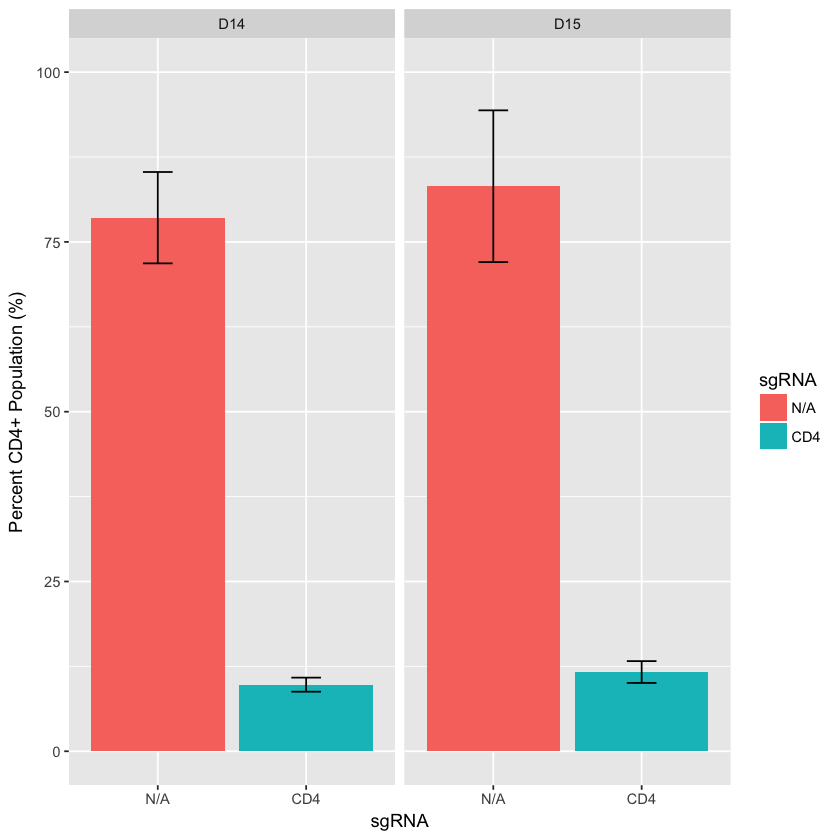

In [18]:
read_tsv(
    'flow-data.tsv',
    col_types=cols(
        `Donor`=col_factor(levels=c('D14', 'D15')),
        `Replicate`=col_factor(levels=c('R1', 'R2', 'R3')),
        `sgRNA`=col_factor(levels=c('N/A', 'CD4')),
        .default=col_double()
    )
) %>% 
group_by(`Donor`, `sgRNA`) %>%
summarize(
    `avg_cd4`=mean(`Live/CD4+ CD8- | Freq. of Parent`),
    `sd_cd4`=sd(`Live/CD4+ CD8- | Freq. of Parent`)
) %>%
ggplot(aes(x=`sgRNA`, y=`avg_cd4`, fill=`sgRNA`)) +
    geom_col() +
    geom_errorbar(aes(
        ymin=`avg_cd4`-`sd_cd4`,
        ymax=`avg_cd4`+`sd_cd4`
    ), width=.2) +
    facet_wrap(~Donor, ncol=2) +
    ylab('Percent CD4+ Population (%)') +
    ylim(0, 100)